# Лабораторная работа №3  
## Методы численного решения нелинейных уравнений

**Вариант:** IV.12.3 (a, ж), IV.12.4 (a), IV.12.6 (д)  
**Методы:**  
0. Метод половинного деления  
1. Метод простой итерации  
2. Метод Ньютона (и модифицированный вариант)  

---


## IV.12.3 (a)  
**Уравнение:**  
\[ 2x^2 + 5x - 3 = 0 \]  

Найти корни методом половинного деления и методом Ньютона.


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, tan
from scipy.optimize import fsolve

# --- Метод половинного деления ---
def bisection(f, a, b, eps=1e-6):
    if f(a)*f(b) > 0:
        raise ValueError("На концах интервала должны быть значения разного знака")
    while (b - a)/2 > eps:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2

# --- Метод Ньютона ---
def newton(f, df, x0, eps=1e-6, max_iter=100):
    x = x0
    for i in range(max_iter):
        x_next = x - f(x)/df(x)
        if abs(x_next - x) < eps:
            return x_next
        x = x_next
    return x


Корень 1 (половинное деление): -3.0
Корень 2 (половинное деление): 0.5
Корень 1 (Ньютона): -3.0
Корень 2 (Ньютона): 0.5


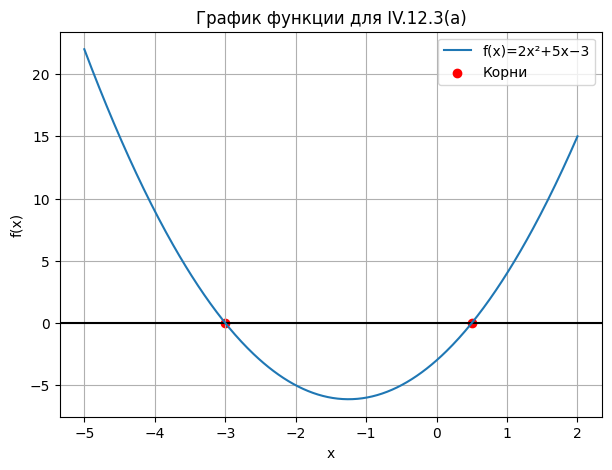

In [2]:

# --- IV.12.3(a) ---
f1 = lambda x: 2*x**2 + 5*x - 3
df1 = lambda x: 4*x + 5

# Корни на интервалах [-4, -2] и [0, 1]
root_bis1 = bisection(f1, -4, -2)
root_bis2 = bisection(f1, 0, 1)
root_newton1 = newton(f1, df1, -3)
root_newton2 = newton(f1, df1, 0.5)

print("Корень 1 (половинное деление):", root_bis1)
print("Корень 2 (половинное деление):", root_bis2)
print("Корень 1 (Ньютона):", root_newton1)
print("Корень 2 (Ньютона):", root_newton2)

# График
x = np.linspace(-5, 2, 400)
y = f1(x)
plt.figure(figsize=(7,5))
plt.axhline(0, color='black')
plt.plot(x, y, label='f(x)=2x²+5x−3')
plt.scatter([root_bis1, root_bis2], [0,0], color='red', label='Корни')
plt.title("График функции для IV.12.3(a)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## IV.12.3 (ж)  
**Уравнение:**  
\[ 2\tan(x) - \frac{x}{2} + 1 = 0 \]  

Найти корни и уточнить один из них методом Ньютона.


Приближённый корень: -0.5713179028318802


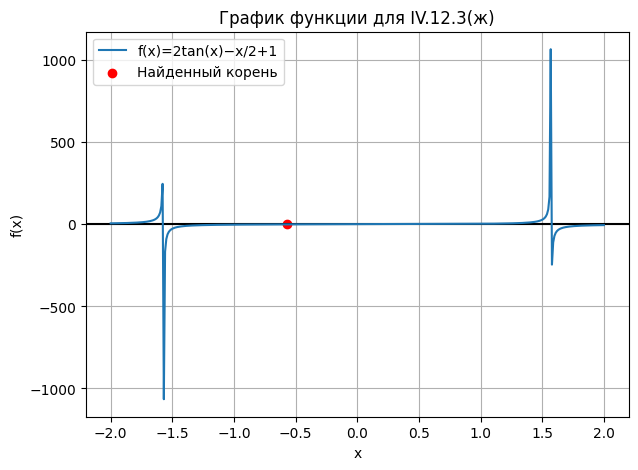

In [3]:

# --- IV.12.3(ж) ---
f2 = lambda x: 2*np.tan(x) - x/2 + 1
df2 = lambda x: 2/(np.cos(x)**2) - 0.5

root_newton = newton(f2, df2, 0.2)
print("Приближённый корень:", root_newton)

# График
x = np.linspace(-2, 2, 400)
y = f2(x)
plt.figure(figsize=(7,5))
plt.axhline(0, color='black')
plt.plot(x, y, label='f(x)=2tan(x)−x/2+1')
plt.scatter(root_newton, 0, color='red', label='Найденный корень')
plt.title("График функции для IV.12.3(ж)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


## IV.12.4 (a)  
**Система:**  
\[
\begin{cases}
\sin(x + 1) - y = 1.2 \\
2x + \cos(y) = 2
\end{cases}
\]

Решить систему с точностью \( \varepsilon = 10^{-3} \).


Решение системы IV.12.4(a): [ 0.51015016 -0.20183842]


/var/folders/7y/8_qdyw1x0570p135qdb9jgn40000gn/T/ipykernel_78029/3162341112.py:12: RuntimeWarning: invalid value encountered in arccos
  y2 = np.arccos(2 - 2*x)


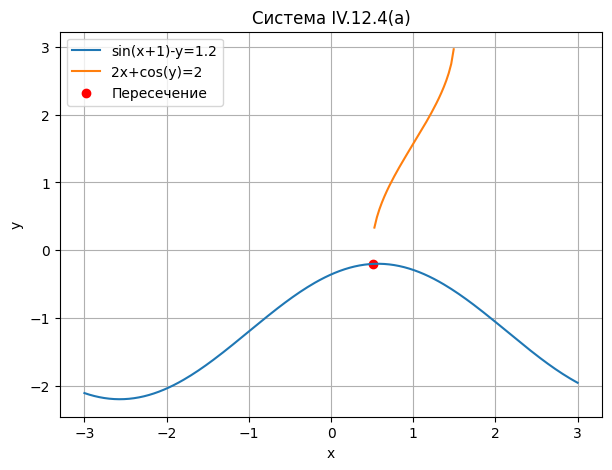

In [4]:

# --- IV.12.4(a) ---
def system_124(vars):
    x, y = vars
    return [np.sin(x + 1) - y - 1.2, 2*x + np.cos(y) - 2]

sol_124 = fsolve(system_124, (0.5, 0.5))
print("Решение системы IV.12.4(a):", sol_124)

# График
x = np.linspace(-3, 3, 200)
y1 = np.sin(x + 1) - 1.2
y2 = np.arccos(2 - 2*x)

plt.figure(figsize=(7,5))
plt.plot(x, y1, label='sin(x+1)-y=1.2')
plt.plot(x, y2, label='2x+cos(y)=2')
plt.scatter(sol_124[0], sol_124[1], color='red', label='Пересечение')
plt.title("Система IV.12.4(a)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## IV.12.6 (д)  
**Система:**  
\[
\begin{cases}
x^7 - 5x^2y^4 + 1510 = 0 \\
y^3 - 3x^4y - 105 = 0
\end{cases}
\]

Найти все точки пересечения с точностью \( \varepsilon = 10^{-5} \).


Решение системы IV.12.6(д): [0.75816806 4.78772666]


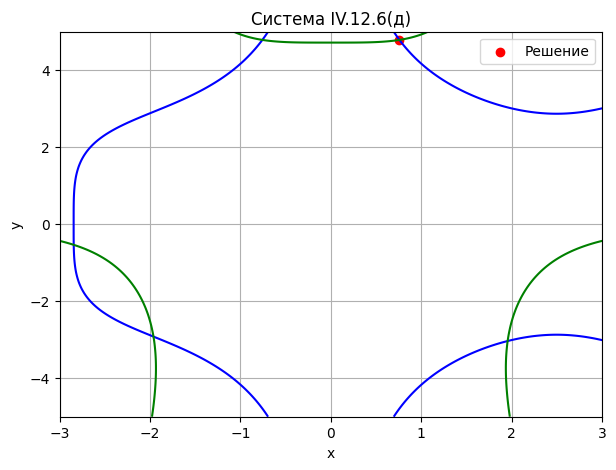

In [5]:

# --- IV.12.6(д) ---
def system_126(vars):
    x, y = vars
    return [x**7 - 5*x**2*y**4 + 1510, y**3 - 3*x**4*y - 105]

sol_126 = fsolve(system_126, (2, 3))
print("Решение системы IV.12.6(д):", sol_126)

# График (ограниченный диапазон из-за степени)
x = np.linspace(-3, 3, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z1 = X**7 - 5*X**2*Y**4 + 1510
Z2 = Y**3 - 3*X**4*Y - 105

plt.figure(figsize=(7,5))
plt.contour(X, Y, Z1, levels=[0], colors='blue')
plt.contour(X, Y, Z2, levels=[0], colors='green')
plt.scatter(sol_126[0], sol_126[1], color='red', label='Решение')
plt.title("Система IV.12.6(д)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
